# Homework 5: Confidence Intervals, Autograders, Freethrows
***

**Name**: Solutions

***

This assignment is due on Moodle by **5pm on Friday April 6th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats
%matplotlib inline

### [20 points] Problem 1 - Alcohol Content of Red vs White Wine 
***

Load the data in $\texttt{winequality-red.csv}$ and $\texttt{winequality-white.csv}$ into Pandas DataFrames.  A description of this dataset can be found on [Berkeley's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The characteristic that we'll be interested in is the wine's alcohol content.  

In [13]:
dfRed = pd.read_csv("data/winequality-red.csv", sep=";")
dfWhite = pd.read_csv("data/winequality-white.csv", sep=";")
print("The number of red wine entries is {} and the number of white wine entries is {}".format(len(dfRed),len(dfWhite)))

The number of red wine entries is 1599 and the number of white wine entries is 4898


**Part A**: Are we justified in using the assumptions of the Central Limit Theorem in our analysis of estimates of the mean of the data?  Justify your response. 

**Solution**: Yes, because there are $m=1599$ samples of red wine and $n=4898$ samples of white wine. These are more than sufficient to satisfy the sample size requirements of the Central Limit Theorem. 

**Part B**: Compute a 95% confidence interval for the mean of the red wine's alcohol content.  Separately, compute a 95% confidence interval for the mean of the white wine's alcohol content. Do all computations in Python. 

**Solution**: Let $\bar{x}_R$ be the sample mean of the red-wine alcohol content.  Let $n_R$ be the number of red-wine samples.  Finally, since we don't know the known variance of the alcohol content, we'll use the sample variance, $s^2_R$ in our confidence interval computation.  With $\alpha = 0.05$, we'll use the $z_{\alpha/2} = z_{.025}$ critical value. Our confidence interval is then 

$$
\bar{x}_R \pm z_{\alpha/2} \cdot \frac{s_R}{\sqrt{n_R}}
$$

Using Python to perform the computation, we find the 95% confidence interval for the mean alcohol content of red wine is $[10.371, 10.475]$. 

In [15]:
z = stats.norm.ppf(.975)
mR = dfRed["alcohol"].mean()
SER = dfRed["alcohol"].std()/np.sqrt(len(dfRed))
print("Red CI: [{:.3f}, {:.3f}]".format(mR-z*SER, mR+z*SER))

Red CI: [10.371, 10.475]


Similarly, let $\bar{x}_W$ be the sample mean of the white-wine alcohol content.  Let $n_W$ be the number of white-wine samples.  Finally, since we don't know the known variance of the alcohol content, we'll use the sample variance, $s^2_W$ in our confidence interval computation.  With $\alpha = 0.05$, we'll use the $z_{\alpha/2} = z_{.025}$ critical value. Our confidence interval is then 

$$
\bar{x}_W \pm z_{\alpha/2} \cdot \frac{s_W}{\sqrt{n_W}}
$$

Using Python to perform the computation, we find the 95% confidence interval for the mean alcohol content of white wine is $[10.454, 10.575]$. 

In [16]:
z = stats.norm.ppf(.975)
mW = dfWhite["alcohol"].mean()
SEW = dfWhite["alcohol"].std()/np.sqrt(len(dfRed))
print("White CI: [{:.3f}, {:.3f}]".format(mW-z*SEW, mW+z*SEW))

White CI: [10.454, 10.575]


**Part C**: Compute the 95% confidence interval for the difference between the means of the alcohol content of red and white wine. 

**Solution**: A confidence interval for the difference of the means, $\mu_R - \mu_W$, is given by 

$$
(\bar{x}_R - \bar{x}_W) \pm z_{\alpha/2}\sqrt{\frac{s_R^2}{n_R} + \frac{s_W^2}{n_W}}
$$

Using Python for the computations we find that a 95% confidence interval for $\mu_R-\mu_W$ is $[-0.171, -0.011]$.

In [17]:
z = stats.norm.ppf(.975)
SE = np.sqrt(SER**2 + SEW**2)
print("Red - White CI: [{:.3f}, {:.3f}]".format((mR-mW)-z*SE, (mR-mW)+z*SE))

Red - White CI: [-0.171, -0.011]


**Part D**: Interpret the confidence interval you computed in **Part C** in one or two sentences.  Can you say that it's likely that there is a difference in mean alcohol content between red and white wine?  

**Solution**: We are confident at the 95% level that the difference of the true mean alcohol content of red vs white wine, $\mu_{R} - \mu_{W}$, is between $-0.171$ and $-0.011$. Since $0$ is not covered by the confidence interval, this indicates that there is substantial statistical evidence to conclude that there is in fact more alcohol in white wine than red wine. 

### [15 points] Problem 2: Election Polling
***

On the eve of an important senate seat election, a pollster polls a simple random sample of the population and asks which candidate they plan to vote for on the following day. In particular, the pollster asks if the respondents plan to vote for Candidate A, Candidate B, or some other candidate.  The results of the poll can be found in the following table: 

\begin{array}{ccc}
\hline 
\textrm{Candidate A} & \textrm{Candidate B} & \textrm{Other} \\
\hline 
1204 & 1099 & 205  \\
\hline 
\end{array}

**Part A**: Poll results are typically reported as a predicted **percentage** of the electorate plus or minus a margin of error, i.e. $\texttt{percentage} \pm \texttt{margin}$.  Express the poll results for Candidates A and B in the specified format at the 95% confidence level. 

**Solution**: For each candidate, we want to compute a 95% confidence interval for the proportion of the population that will vote for the candidate.  Let $\hat{p}$ be the sample proportion for each candidate.  Then the 95% confidence interval is given by 

$$
\hat{p} \pm z_{\alpha/2} ~ \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

where $\alpha = 0.05$ and $z_{\alpha/2} = z_{0.025} = 1.96$.  Expressing this quantity in terms of percentages, we have 

$$
\textrm{Candidate A:} \quad 48.0 \pm 2.8 
\quad \textrm{and} \quad 
\textrm{Candidate B:} \quad 43.8 \pm 2.8 
$$

In [19]:
def poll_margins(poll, alpha=.05):
    poll = np.array(poll)
    n = np.sum(poll)
    ps = poll[:2]/n
    SE = np.sqrt(np.sum([p*(1-p)/n for p in ps])) 
    z = stats.norm.ppf(1.0-alpha/2)
    for ii, l in enumerate(['A', 'B']):
        print('Candidate ', l, ': {:.1f} +/- {:.1f}'.format(100*ps[ii], 100*z*SE))
    
poll = np.array([1204, 1099, 205])
poll_margins(poll)

Candidate  A : 48.0 +/- 2.8
Candidate  B : 43.8 +/- 2.8


**Part B**: Express the poll results as 95% confidence intervals.  Based on these results, would it be responsible for a newspaper to definitely call the election for a particular candidate? Clearly justify your response. 

**Solution**: Computing the equivalent 95% confidence intervals in terms of percentages, we find 

$$
\textrm{Candidate A:} \quad [45.3, 50.8] 
\quad \textrm{and} \quad 
\textrm{Candidate B:} \quad [41.1, 46.6] 
$$

Since the confidence intervals overlap, it would be irresponsible for the newspaper to predict an outright winner in the election. 

In [20]:
def poll_CIs(poll, alpha=.05):
    poll = np.array(poll)
    n = np.sum(poll)
    ps = poll[:2]/n
    SE = np.sqrt(np.sum([p*(1-p)/n for p in ps])) 
    z = stats.norm.ppf(1.0-alpha/2)
    for ii, l in enumerate(['A', 'B']):
        print('Candidate ', l, ': [{:.1f}, {:.1f}]'.format(100*(ps[ii]-z*SE), 100*(ps[ii]+z*SE)))
    
poll = np.array([1204, 1099, 205])
poll_CIs(poll)

Candidate  A : [45.3, 50.8]
Candidate  B : [41.1, 46.6]


**Part C**: In the run-up to the next election, the pollster is designing a poll of a city council race between two relatively unknown candidates.  Without having any prior data, how many respondents does the pollster need responses from to guarantee that she will get at most a 2% margin of error at the 95% confidence level? Be sure to **clearly** justify your reasoning.  

**Hint**: Recall that when computing a confidence interval for proportion we use the actual sample proportion to approximate the variance.  How can you get a worst-case scenario estimate of the variance when the sample proportion is not known _a priori_? 


**Solution**: The problem is that the margin of error is of the form $z_{\alpha/2} \times SE$, where the standard error, $SE$, depends on the sample estimates of the proportion of the electorate planning to vote for a particular candidate.  Since we don't yet have a good estimate of this proportion, we can't actually compute $SE$.  Instead we'll need to find a worst-case estimate of this value.  

Recall that the standard error for a proportion is given by 

$$
SE = \sqrt{\frac{p(1-p)}{n}}
$$

Note that the value of $p$ that maximizes $SE$ is $p = \frac{1}{2}$.  So by setting $p = \frac{1}{2}$ we'll get the largest $SE$ possible as a function of $n$.  

At the 95% confidence level we have $z_{\alpha/2} = 1.96$.  Thus the margin of error is given by 

$$
\texttt{margin} = 1.96 \times \frac{1/2}{\sqrt{n}} = \frac{0.98}{\sqrt{n}}
$$

If we want the margin to be at most 2% we must have 

$$
 \frac{0.98}{\sqrt{n}} < 0.02 \quad \Rightarrow \quad n \geq \left(\frac{0.98}{0.02}\right)^2 = 2401
$$

### [15 points] Problem 3 - Have Opinions on Marijuana Legalization Changed? 
***

The General Social Survey (GSS) has been collecting demographic, behavioral, and attitudinal information since 1972 to monitor changes within the US and to compare the US to other nations. Support for the legalization of marijuana in the US is shown for 2010 and in 2016 in the following table:


\begin{array}{cccc}
\hline
\textrm{Year} & \textrm{Favor} & \textrm{Oppose} & \textrm{Total} \\ 
\hline
\textrm{2010} & \textrm{603} & \textrm{656} & \textrm{1259} \\
\textrm{2016} & \textrm{1126} & \textrm{717} & \textrm{1843} \\
\hline
\end{array}


**Part A**: Find a 95% confidence interval for the change in the proportion supporting marijuana legalization from 2010 to 2016. Use Python for all computations and show your work. 

**Solution**: Let $\hat{p}_1$ and $\hat{p}_2$ be the sample proportions for support of marijuana legalization in 2016 and 2010, respectively. Then 

$$
\hat{p}_1 = \frac{1126}{1843} \approx 0.611 \quad \textrm{and} \quad   
\hat{p}_2 = \frac{603}{1259} \approx 0.479 
$$

The standard error for the difference is given by 

$$
SE = \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{m} + \frac{\hat{p}_2(1-\hat{p}_2)}{n}} \approx 
\sqrt{ \frac{0.611(1-0.611)}{1843} + \frac{0.479(1-0.479)}{1259} }  \approx 0.0181
$$

Using $z_{0.025} = 1.96$ we have 

$$
(\hat{p}_1 - \hat{p}_2) \pm z_{0.025}\times SE = 0.132 \pm 1.96 \times 0.0181 \approx 0.132 \pm 0.0354 
$$

which translates to a 95% confidence interval of $[0.096, 0.167]$.

**Part B**: Is it likely that the proportion supporting marijuana legalization changed between 2010 and 2016? Justify your conclusion using the ideas of statistical inference and your results from **Part A**. 

**Solution**: Since $0$ is not included in the confidence interval for the change in proportions of support, we conclude that it is in fact likely that opinions on marijuana legalization changed between 2010 and 2016. 

### [20 points] Problem 4 - Exploring Confidence Intervals 
***

The so-called [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution is important in several statistical tests.  It's also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [chi2](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.chi2.html). 


In [21]:
from scipy.stats import chi2

**Part A**: Complete the following code cell to plot a histogram of realizations from the Chi-squared distribution with parameter $K=3$. 

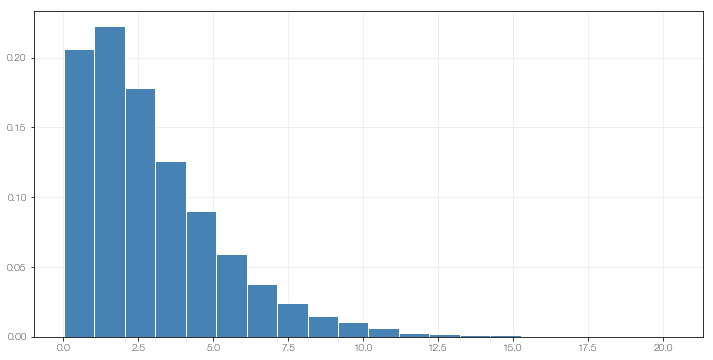

In [22]:
k = 3 
x = chi2.rvs(k, size=10000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, normed=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

**Part B**: Look up the mean and variance of the Chi-squared distribution with parameter $k=3$ and report them here. 

**Solution**: If $X \sim \chi^2(3)$ then $E[X] = 3$ and $\textrm{Var}(X) = 6$.  

**Part C**: In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Chi-squared distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Chi-squared distribution with parameter $k=3$.  For each random sample, compute the 95% confidence interval for the mean.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\mu$ where $\mu$ is the true mean of the distribution. Color confidence intervals black if they cover the true mean, and red if they don't.  

proportion covering mean: 0.954


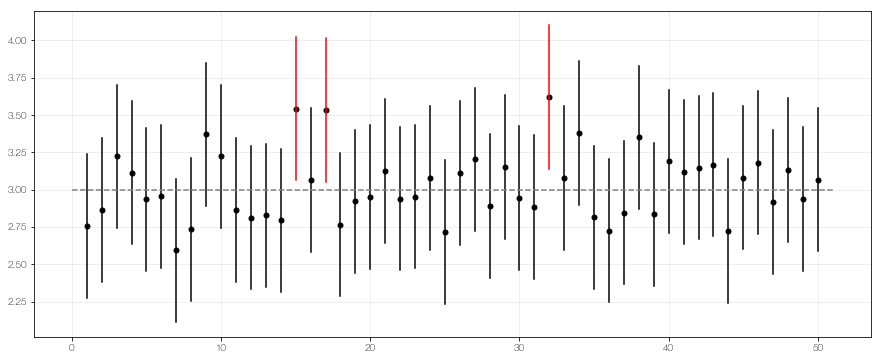

In [23]:
def confidence_intervals(m=500, n=100):
    k = 3 
    EX = k 
    VX = 2*k 
    CIs = np.zeros((m,2))
    z = stats.norm.ppf(.975)
    SE = np.sqrt(VX/n)
    ctr = 0 
    for ii in range(m):
        x = stats.chi2.rvs(k, size=n)
        xbar = np.mean(x) 
        L, U = xbar - z*SE, xbar + z*SE
        CIs[ii,0] = L 
        CIs[ii,1] = U 
        ctr += 1 if (L <= EX) and (EX <= U) else 0 
        
    print("proportion covering mean: {:.3f}".format(ctr/m))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
    for ii, row in enumerate(np.random.choice(range(m), size=50, replace=False)):
        L, U = CIs[row,:]
        color = "black" if (L <= EX) and (EX <= U) else "red" 
        plt.plot([ii+1, ii+1], [U, L], color=color)
        plt.scatter([ii+1], (U+L)/2, s=25, color="k")
    plt.plot([0,51], [k,k], color="gray", ls="--")
    ax.grid(alpha=0.25)
    
confidence_intervals()

**Part D**: Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

**Solution**: A 95% confidence interval for the mean constructed in the above manner should cover the true mean of the population 95% of the time.  In the experiment above we see that for $m=500$ independently created confidence intervals the 95% confidence intervals covered the mean 95% of the time (which was slightly lucky; in general we expect the mean to be covered around 95% of the time. 

### [15 points] Problem 5 - Autograding Simulation Homework 
***

Suppose that you are the grader for an Introduction to Data Science course and your boss has asked you to write an autograder for a homework problem on simulation.  Specifically, students have been asked to write a simulation to estimate the expected number of rolls it will take until doubles are rolled with a pair of fair, six-sided dice (i.e. until both dice show the same value).  The students have been asked to structure their code so that it runs many trials of the experiment and returns the sample mean of the trials, as well as an array containing the result of each individual trial. 

The solutions submitted by three students in the course are given below. 

In [24]:
def student1(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 0
        while np.random.choice([1,2,3,4,5,6]) != np.random.choice([1,2,3,4,5,6]):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student2(num_trials=5000):
    t = np.zeros(num_trials)
    for ii in range(num_trials):
        ctr = 1
        while int(6*np.random.uniform(0,1)+1) != int(6*np.random.uniform(0,1)+1):
            ctr += 1 
        t[ii] = ctr 
    return np.mean(t), t

def student3(num_trials=5000):
    t = np.random.exponential(6, size=num_trials)
    return np.mean(t), t 

Now, you landed this job at the last minute, and your probability theory is a little rusty.  Luckily, your boss has given you his solution to the problem which is shown below: 

In [25]:
def prof(num_trials=5000):
    t = np.random.geometric(1/6, size=num_trials)
    return np.mean(t), t

Knowing that your probability theory is rusty, your boss has suggested that your autograder be constructed solely based on confidence intervals to compare the students' estimates of the expected value of the experiment to his own estimate.  Finally, although there are only examples from three students above, there are actually more than 100 students in the course, so tailoring your tests to features of individual students' code is out of the question. 

**Part A**: Complete the function autograder below, which takes in the realizations of the trials from your professor's code and one of the students' codes, as well as the $\alpha$ for a $100(1-\alpha)\%$ confidence interval and returns a string indicating whether the student passed or failed the test. **Clearly** indicate what statistical test(s) your autograder is using and why this is a good idea.  Then demonstrate the use of your autograder to grade the three student solutions above. 

**Solution**: Our autograder will be based on creating a $100(1-\alpha)\%$ confidence interval for the difference between the means of the student data and the professor data.  Our confidence interval will be constructed as follows: 

$$
(\bar{x}_s - \bar{x}_p) \pm z_{\alpha/2}\cdot \sqrt{\frac{s_s^2}{n_s} + \frac{s_p^2}{n_p}}
$$

where $\bar{x}_2$ and $\bar{x}_p$ are the sample means of the students and professors data, respectively, and $s_2^2$ and $s_p^2$ are the sample variances of the students and professors data, respectively. 

If the computed 95% confidence interval for the difference between the true means covers $0$ then we will conclude that there is statistical evidence the means are same and the students code is correct. Of course, if the test fails, we should run it again, since even if the students code is correct, the 95% confidence interval will not cover $0$ around 5% of the time.  

In [27]:
def autograder(pf, st, alpha=0.05):
    
    meandiff = np.mean(st) - np.mean(pf)
    z = stats.norm.ppf(1-alpha/2)
    SE = np.sqrt(np.var(st)/len(st) + np.var(pf)/len(pf)) 
    CI = [meandiff + flip*z*SE for flip in [-1,1]]
    
    if (CI[0] <= 0) and (0 <= CI[1]):
        return "Passed"
    else:
        return "Failed"

Next we'll test our autograder on the three students codes.  

In [28]:
pfmean, pf = prof()

st1mean, st1 = student1()
print("Student 1 Test:", autograder(pf, st1, alpha=0.05))

st2mean, st2 = student2()
print("Student 2 Test:", autograder(pf, st2, alpha=0.05))

st3mean, st3 = student3()
print("Student 3 Test:", autograder(pf, st3, alpha=0.05))

Student 1 Test: Failed
Student 2 Test: Passed
Student 3 Test: Passed


Our tests with the autograder indicate that the first student's code is incorrect, but the second and third students' codes are correct. 

**[Extra Credit] Part B**: You realize that tests based solely on the estimate of the mean are not robust.  Come up with a better autograder that, again using tests based on confidence intervals, compares the students' solutions to the professor's solutions on statistical properties beyond just the mean. Again, **clearly** motivate the features of your autograder based on theory developed in class.    

**Solution**: In addition to checking that the means of the students' and professor's codes agree, it might be worth it to test that their variances are the same. We'll do this using a bootstrapping procedure to compute a 95% confidence interval for the difference of the variances of the results of the students and professors codes.  Pseudocode for our procedure to find a boostrapped confidence interval for the difference in the variance will be as follows: 

In [ ]:
# PSEUDOCODE... DO NOT EXECUTE
for ii = 1 to num_boots: 
    xs = resample student data with replacement 
    xp = resample profesor data with replacement 
    bootdiff[ii] = sample_var(xs) - sample_var(xp)
    
CI = [2.5th percentile of bootdiff, 97.5th percentile of bootdiff]

Our actual Python code is as follows: 

In [30]:
def bootstrapped_CI(pf, st, num_boots=10000, alpha=0.05):
    bootdiff = np.zeros(num_boots)
    for ii in range(num_boots):
        xs = np.random.choice(st, size=len(st), replace=True)
        xp = np.random.choice(pf, size=len(pf), replace=True)
        bootdiff[ii] = np.var(xs) - np.var(xp)
    CI = np.array([np.percentile(bootdiff, 100*alpha/2), np.percentile(bootdiff, 100*(1-alpha/2))])
    return CI 

def better_autograder(pf, st, alpha=0.05):
    
    meandiff = np.mean(st) - np.mean(pf)
    z = stats.norm.ppf(1-alpha/2)
    SE = np.sqrt(np.var(st)/len(st) + np.var(pf)/len(pf)) 
    mean_CI = [meandiff + flip*z*SE for flip in [-1,1]]
    var_CI = bootstrapped_CI(pf, st, num_boots=10000, alpha=alpha)
    
    if (mean_CI[0] <= 0) and (0 <= mean_CI[1]) and (var_CI[0] <= 0) and (0 <= var_CI[1]):
        return "Passed"
    else:
        return "Failed"

Next we'll test our autograder on the three students codes.  

In [31]:
pfmean, pf = prof()

st1mean, st1 = student1()
print("Student 1 Test:", better_autograder(pf, st1, alpha=0.05))

st2mean, st2 = student2()
print("Student 2 Test:", better_autograder(pf, st2, alpha=0.05))

st3mean, st3 = student3()
print("Student 3 Test:", better_autograder(pf, st3, alpha=0.05))

Student 1 Test: Failed
Student 2 Test: Passed
Student 3 Test: Failed


Our tests with the better autograder indicate that both the first and third students codes are incorrect, but the second student's code is correct. It appears that while Student 3's code passed the test for the mean, it failed the test for the variance.  If you look carefully at the way that Student 3's code is implemented, you'll see that they are simulating an exponential random variable which has the same mean as the professor's code, but has a very different variance. 

### [15 points] Problem 6 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the third Jack.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes. Compute the mean, median, and mode for this dataset, indicate them on the plot too. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

In [3]:
def threejacksim(n_trials = 1000000):
    results = np.zeros(n_trials,dtype=int)
    for ii in range(n_trials):
        deck = np.array(list(range(0,13))*4)+1
        np.random.shuffle(deck)
        jacks = deck==11
        results[ii] = np.where(np.cumsum(jacks)==3)[0][0]
    return results

x = threejacksim()
print("Mean: {:.3f}".format(np.mean(x)))
print("Median: {}".format(np.median(x)))
print("Mode: {}".format(stats.mode(x,axis=None).mode[0]))

Mean: 30.802
Median: 32.0
Mode: 34


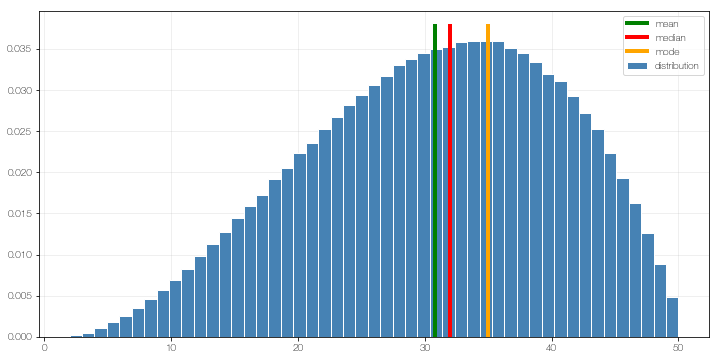

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=49, normed=True,label="distribution")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
yl = ax.get_ylim()
ax.plot(np.mean(x)*np.ones(2),yl,c='g',zorder=2,lw=4,label="mean")
ax.plot(np.median(x)*np.ones(2),yl,c='r',zorder=2,lw=4,label="median")
ax.plot(stats.mode(x,axis=None).mode[0]*np.ones(2),yl,c='orange',zorder=2,lw=4,label="mode")
ax.legend()

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Jerry Ferguson and Steve Ferguson. You prepare to take anotter shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

A 99% confidence interval is wider. Remember that a 99% confidence interval will have the true mean in it 99% of the time, but a 95% confidence interval will have the true mean in it only 95% of the time. That means that the 95% confidence interval hast got to be smaller, since it misses the mean more often. This is why, my dear sibling, the goalie's hockey stick is bigger than everyone else's. When something is bigger it's going to catch more stuff.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the standard deviation.
***

In [58]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [66]:
# CI = sqrt( n-1   S^2 / X^2 a/2 n-1 )   , sqrt( n-1   S^2 / X^2 1-a/2 n-1 ) 
n = len(durant)
dof = n-1
sample_var = np.var(durant,ddof=1)
alpha = 0.05;
L = np.sqrt((n-1)*sample_var/stats.chi2.ppf(1-alpha/2,dof))
U = np.sqrt((n-1)*sample_var/stats.chi2.ppf(alpha/2,dof))
print("CI: [{:.3f},{:.3f}]".format(L,U))
print("Sample StDev: {:.3f}".format(np.sqrt(sample_var)))

CI: [0.078,0.207]
Sample StDev: 0.114


**Part D**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Maureen Ferguson. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. Ferguson suggests that you do the following CSCI3022 problem:</font>

You collect 53 samples of hair from baby river otters and find that they are, on average, 22.6 mm long, with a standard devaition of 15.2mm. 

Then you collect 41 samples of hair from baby sea otters and find that they are, on average, 26.4 mm long, with a standard deviation of 11.4 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby sea otter hair length exceeds the true mean of baby river otter hair length by more than 3 mm?  Use a test of your choice.

***

Let's start with our null and alternative hypotheses:

$$H_0 : \mu_\text{sea} - \mu_\text{river} = 3$$
$$H_1 : \mu_\text{sea} - \mu_\text{river} > 3$$

If we assume the null hypothesis (which we do when we're going to do hypothesis testing) then $\mu_\text{sea} - \mu_\text{river}=3$. 

The CLT tells us that

$$ \bar{x}_\text{sea} - \bar{x}_\text{river} \sim N \left( \mu_\text{sea} - \mu_\text{river}, \frac{\sigma_\text{sea}^2}{m} + \frac{\sigma_\text{river}^2}{n}  \right ) $$

Assuming $H_0$ and applying Box-Muller means that

$$ \frac{\bar{x}_\text{sea} - \bar{x}_\text{river} - 3}{\sqrt{\frac{\sigma_\text{sea}^2}{m} + \frac{\sigma_\text{river}^2}{n}}} \sim Z$$

This allows us to plug in and compute our test statistic
$$ \frac{26.4 - 22.6 - 3}{\sqrt{\frac{11.4^2}{41} + \frac{15.2^2}{53}}} = z$$

In [68]:
numerator = 26.4-22.6-3
denominator = np.sqrt(11.4*11.4/41 + 15.2*15.2/53)
z = numerator/denominator
print("z={:.4f}".format(z))

z=0.2916


We can now decide whether to do a rejection region test or a p-value test. Here are both.

In [74]:
# rejection region test
z_crit = stats.norm.ppf(0.95)
print("z_crit = {:.4}".format(z_crit))

z_crit = 1.645


Since $z < z_{crit}$, we fail to reject the null hypothesis. 

In [77]:
# p-value test
p = 1-stats.norm.cdf(z)
print("p-value = {:.4f}".format(p))

p-value = 0.3853


Since $p > 0.05$, we fail to reject the null hypothesis.

**Part E**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

If our alternative hypothesis is that the carbon is too weak, and therefore unsafe, then we want to err on the side of rejection. After all, these are airplanes!! Therefore, we really want to AVOID FALSE NEGATIVES. No bad stuff should get through. If we scrap some good stuff (false positives) then that's just the price we'll have to pay. 

Therefore, we would rather have a LOW TYPE II ERROR RATE.